In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('datasets/placement2.csv')

In [47]:
df.shape

(1000, 3)

In [48]:
df.sample(5)

,cgpa,placement_exam_marks,placed
219,5.48,3.0,0
358,6.74,52.0,0
782,7.65,41.0,0
475,7.38,10.0,0
804,6.49,81.0,0


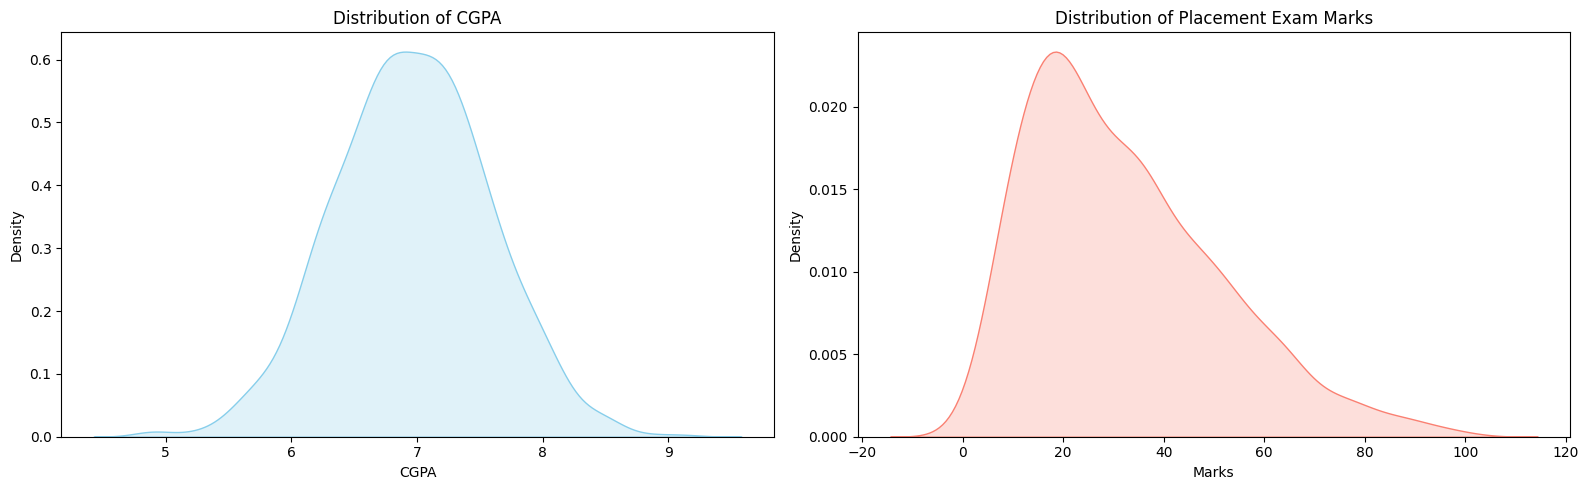

In [49]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# CGPA Distribution (using kdeplot, no 'kde' argument needed)
sns.kdeplot(df['cgpa'], fill=True, color='skyblue', ax=ax1)
ax1.set_title('Distribution of CGPA')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Density')

# Placement Exam Marks Distribution
sns.kdeplot(df['placement_exam_marks'], fill=True, color='salmon', ax=ax2)
ax2.set_title('Distribution of Placement Exam Marks')
ax2.set_xlabel('Marks')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [50]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [51]:
# Finding the boundary values
print("Highest allowed", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed", df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [52]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [69]:
# Trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [70]:
new_df.shape

(995, 4)

## Another approach of trimming

In [71]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std()

In [72]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [73]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [74]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [75]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [76]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [78]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [79]:
upper_limit

8.808933625397168

In [80]:
lower_limit

5.113546374602832

In [ ]:
# np.where(condition, if true then what you want to do, if false then what you want to do)

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df.shape

In [ ]:
df['cgpa'].describe()

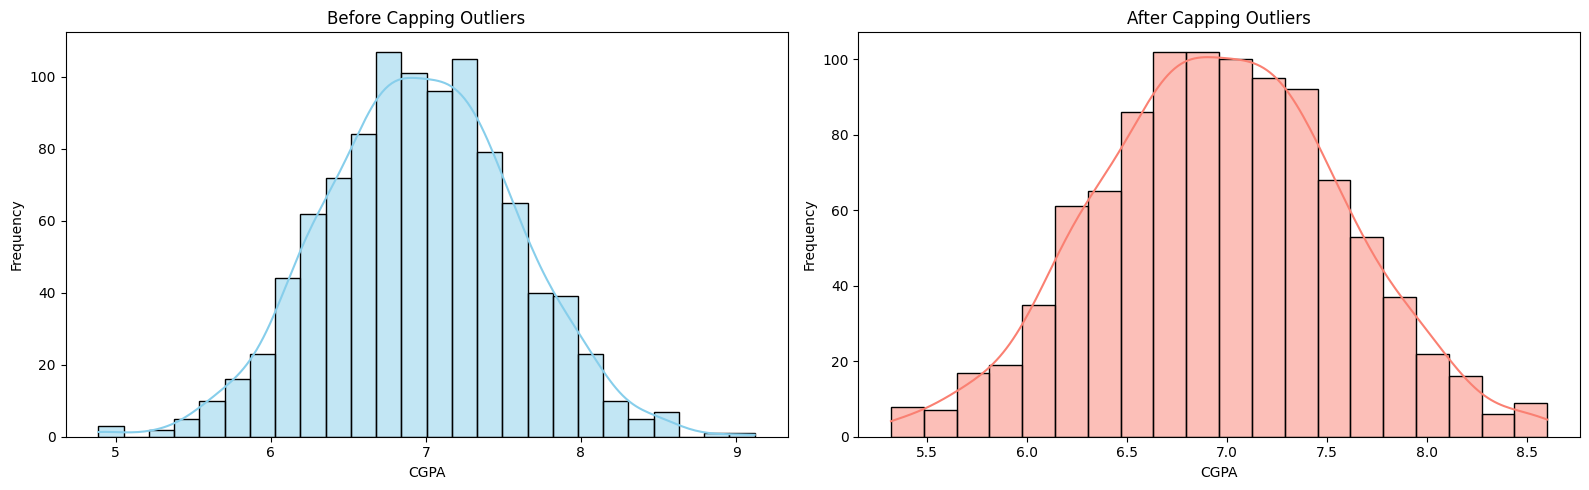

In [83]:
# Plotting before and after
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Before capping
sns.histplot(df['cgpa'], kde=True, color='skyblue', ax=ax1)
ax1.set_title('Before Capping Outliers')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Frequency')

# After capping
sns.histplot(df['cgpa_capped'], kde=True, color='salmon', ax=ax2)
ax2.set_title('After Capping Outliers')
ax2.set_xlabel('CGPA')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
